# BEDU
## Módulo 3 - Data Analysis

## Análisis: Ofertas de empleo para Data Scientist
  
  
  
  
Burgos Yanes Andrea Sarai  
Cruz Oviedo Arturo  
Hernández González Ricardo Paramont    
Rivas Roa Ricardo Eduardo  

**DataSet**:  DataScientist.csv

*********

### Requerimientos
La siguiente línea de código es para instalar los requerimientos que se necesitan para correr este proyecto. Si alguna paquetería marca error y no se instala correctamente el problema se puede solucionar instalando la paquetería con la linea de código pip comentada abajo del pip de requirements. Sólo basta con cambiar (paqueteria con error) por el nombre de la paquetería que se quiere instalar.

In [1]:
pip install -r requirements.txt

  Using cached keplergl-0.2.2.tar.gz (7.9 MB)



    ERROR: Command errored out with exit status 1:
     command: 'C:\ProgramData\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-6lxongvb\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\Dell\\AppData\\Local\\Temp\\pip-install-6lxongvb\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Dell\AppData\Local\Temp\pip-pip-egg-info-xeetihl2'
         cwd: C:\Users\Dell\AppData\Local\Temp\pip-install-6lxongvb\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.

  Using cached traittypes-0.2.1-py2.py3-none-any.whl (8.6 kB)
  Using cached geopandas-0.9.0-py2.py3-none-any.whl (994 kB)
  Using cached Shapely-1.7.1-cp38-cp38-win_amd64.whl (1.0 MB)
  Using cached pyproj-3.0.1-cp38-cp38-win_amd64.whl (14.5 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)


In [ ]:
#pip install (paqueteria con error)

### Importar paquetes
Bibliotecas para manejo de datos

In [2]:
#bibliotecas para manejo de datos
import pandas as pd
import numpy as np

### Identificación del problema

### Planteamiento de preguntas

* ¿Cuál sector solicita más científicos de datos?
* ¿Qué ciudades tienen una mayor concentración de científicos de datos?
* ¿Cuáles compañias tienen mayor concentración de empleados?
* ¿Cómo califican a la empresa sus empleados?
* ¿Cuál es el salario más alto y más bajo que percibe un científico de datos?
* ¿Cuál es el sueldo promedio de un cientifíco de datos?
* ¿Cuántos empleados tienen las compañias que solicitan científicos de datos?
* ¿Qué puestos son los que requieren de un científico de datos?


### Campos de información

**Job Title**: Nombre de la oferta de trabajo.  
**Salary Estimate**: Rango del salario estimado por el portal Glassdoor, en miles de dólares representado en la notación K.  
**Job Description**: Descripción de distintos rubros de la empresa, puesto y solicitud.  
**Rating**: Calificación por parte de usuarios de la empresa en cuestion. El valor se encuentra entre 1.0 y 5.0, redondeado con un decimal.  
**Company Name**: Nombre de la compañía que ofrece la oferta de trabajo.  
**Location**: Ciudad donde se ubica el trabajo ofertado, junto con el estado o país al que pertenece.  
**Headquarters**: Ciudad y estado/pamís donde se ubica la sede de la empresa.  
**Size**: Divide a las empresas según su número de empleados en rangos
específicos.  
**Founded**: Año de fundación de la empresa.  
**Type of Ownership**: Tipo de compañía según razón social o identidad.  
**Industry**: Tipo de compañía según idustria en la que trabaja.  
**Sector**: Sector en la que la compañía ofrece sus bienes o servicios.  
**Revenue**: Utilidades de la compañía en dolares al año.  
**Competitors**: Principal compañía competidora de la compañía que ofrece la oferta de trabajo.
**Easy Apply**: Etiqueta que indica si la aplicación por el puesto es sencilla.  

### Importación del dataset

* Como valores ausentes, contamos con registros de tipo -1 o 'Unknown / Non-Applicable'.  
* De la variable de Salary Estimate extraemos salary minimum y salary maximum desde la importación de los datos por la importancia de dicha información.

In [3]:
#Importando dataset
#   Valores nulos son -1 en esta tabla
df = pd.read_csv("DataScientist.csv",na_values=[-1,'-1','Unknown / Non-Applicable'])
#Eliminando columnas de indice
df = df.drop(df.columns[:2], axis=1)
#Cambiando espacios en nombres de columnas por '_'
# Pasando a minusculas
df.columns = df.columns.str.replace(' ','_').map(str.lower)
df

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\r\n\r\nAt Hopper, we’re on a miss...",3.5,Hopper\r\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,NaN,NaN
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\r\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,NaN,NaN
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\r\n\r\nhttps://www.decode-m.com/\r\n\...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,Unknown,NaN,NaN,NaN,NaN,True
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\r\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,NaN,"Zocdoc, Healthgrades",NaN
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\r\nDescripti...",3.4,United Entertainment Group\r\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,"BBDO, Grey Group, Droga5",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,AWS Data Engineer,$55K-$112K (Glassdoor est.),About Us\r\n\r\nTachyon Technologies is a Digi...,4.4,Tachyon Technologies\r\n4.4,"Dublin, OH","Irving, TX",201 to 500 employees,2011.0,Company - Private,IT Services,Information Technology,$10 to $25 million (USD),NaN,NaN
3905,Data Analyst â Junior,$55K-$112K (Glassdoor est.),"Job description\r\nInterpret data, analyze res...",5.0,"Staffigo Technical Services, LLC\r\n5.0","Columbus, OH","Woodridge, IL",51 to 200 employees,2008.0,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN
3906,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),Job DescriptionThe Security Analytics Data Eng...,3.8,"PDS Tech, Inc.\r\n3.8","Dublin, OH","Irving, TX",5001 to 10000 employees,1977.0,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),NaN,NaN
3907,Security Analytics Data Engineer,$55K-$112K (Glassdoor est.),The Security Analytics Data Engineer will inte...,4.0,Data Resource Technologies\r\n4.0,"Dublin, OH","Omaha, NE",1 to 50 employees,NaN,Company - Private,Accounting,Accounting & Legal,Less than $1 million (USD),NaN,NaN


# Limpieza y calidad de datos

## Duplicados

In [4]:
#Numero de duplicados
df.duplicated().sum()

0

No hay duplicados de facil identidicación en el dataframe.

## Completitud

In [5]:
#Definiendo función para revisión de completitud
def completitud(df):
    """Revisa porcentaje de los valores no faltantes.

    Parametros
    ----------
    df : pandas.DataFrame
        Data

    Retorna
    -------
    pandas.DataFrame
        dataframe con culumnas:
            columna
            total missings 
            completitud: porcentaje de valores faltantes
    """
    comp = pd.DataFrame(df.isnull().sum())
    comp = comp.reset_index()
    comp = comp.rename(columns={"index":"columna",0:"total missings"})
    comp["completitud"] = (1-comp["total missings"]/len(df))*100
    comp = comp.sort_values(by="completitud")
    comp = comp.reset_index(drop=True)
    return comp

In [6]:
#Revisando completitud
completitud(df)

,columna,total missings,completitud
0,easy_apply,3745,4.195446
1,competitors,2760,29.393707
2,revenue,1392,64.389870
3,founded,977,75.006395
4,industry,546,86.032233
5,sector,546,86.032233
6,rating,409,89.536966
7,headquarters,240,93.860322
8,size,229,94.141724
9,type_of_ownership,229,94.141724


## Limpieza de texto

In [7]:
#Definiendo función para limpeza de texto
import unicodedata
import re

def limpiar_texto(text, pattern="[^a-zA-Z0-9 ]",replace=" "):
    """Remueve o reemplaza caracteres especiales de strings.

    Parametros
    ----------
    text : string
        texto a limpiar.
    pattern : str, optional
        regex de caracteres a reemplazar, default "[^a-zA-Z0-9 ]"
    replace : str, optional
        string para reemplazar caracteres matcheados, default " "

    Retorna
    -------
    string
        Retorna texto limpio.
    """
    #Normalizando caracteres especiales como ñ ---> n
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore') #https://docs.python.org/3/library/unicodedata.html
    #Reemplazando caracteres del pattern
    cleaned_text = re.sub(pattern, replace, cleaned_text.decode("utf-8"), flags=re.UNICODE)
    #Uniendo y pasando a minúsculas
    cleaned_text = u' '.join(cleaned_text.strip().lower().split())
    return cleaned_text

In [8]:
#Limpiando columnas de texto
df['job_title'] = df["job_title"].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z ]",replace=""))
df['location'] = df["location"].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z, ]",replace=""))
df["headquarters"] = df["headquarters"].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z, ]",replace=""),na_action='ignore')
df['industry'] = df['industry'].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z ]",replace=""),na_action='ignore')
df['sector'] = df['sector'].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z ]",replace=""),na_action='ignore')
df['type_of_ownership'] = df['type_of_ownership'].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z-/ ]",replace=""),na_action='ignore')
df['size'] = df['size'].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z0-9 ]",replace=""),na_action='ignore')
df['company_name'] = df['company_name'].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z- ]",replace=""))
df['job_description'] = df['job_description'].map(lambda x:limpiar_texto(x.lower(), pattern="[^a-zA-Z ]",replace=""))
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply
0,senior data scientist,$111K-$181K (Glassdoor est.),about hopperat hopper were on a mission to mak...,3.5,hopper,"new york, ny","montreal, canada",501 to 1000 employees,2007.0,company - private,travel agencies,travel tourism,NaN,NaN,NaN
1,data scientist product analytics,$111K-$181K (Glassdoor est.),at noom we use scientifically proven methods t...,4.5,noom us,"new york, ny","new york, ny",1001 to 5000 employees,2008.0,company - private,health beauty fitness,consumer services,NaN,NaN,NaN
2,data science manager,$111K-$181K (Glassdoor est.),decodemhttpswwwdecodemcomdata science manager ...,NaN,decodem,"new york, ny","new york, ny",1 to 50 employees,NaN,unknown,NaN,NaN,NaN,NaN,True
3,data analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.4,sapphire digital,"lyndhurst, nj","lyndhurst, nj",201 to 500 employees,2019.0,company - private,internet,information technology,NaN,"Zocdoc, Healthgrades",NaN
4,director data science,$111K-$181K (Glassdoor est.),director data science descriptionedelman intel...,3.4,united entertainment group,"new york, ny","new york, ny",51 to 200 employees,2007.0,company - private,advertising marketing,business services,NaN,"BBDO, Grey Group, Droga5",NaN


## Consistencia

### Separando salary estimate en minimum y maximum y checando consistencia

In [9]:
#Separando salary_estimate
df[['salary_min','salary_max']] = df['salary_estimate'].str.split('-', expand=True)
df[['salary_max','salary_estimate_source']] = df['salary_max'].str.split(' ',1,expand=True)
df.filter(like='salary')

,salary_estimate,salary_min,salary_max,salary_estimate_source
0,$111K-$181K (Glassdoor est.),$111K,$181K,(Glassdoor est.)
1,$111K-$181K (Glassdoor est.),$111K,$181K,(Glassdoor est.)
2,$111K-$181K (Glassdoor est.),$111K,$181K,(Glassdoor est.)
3,$111K-$181K (Glassdoor est.),$111K,$181K,(Glassdoor est.)
4,$111K-$181K (Glassdoor est.),$111K,$181K,(Glassdoor est.)
...,...,...,...,...
3904,$55K-$112K (Glassdoor est.),$55K,$112K,(Glassdoor est.)
3905,$55K-$112K (Glassdoor est.),$55K,$112K,(Glassdoor est.)
3906,$55K-$112K (Glassdoor est.),$55K,$112K,(Glassdoor est.)
3907,$55K-$112K (Glassdoor est.),$55K,$112K,(Glassdoor est.)


In [10]:
#Definiendo función para transformar salario de string a integer
def transformar_salary(text):
    """ matchea y transforma números en strings en orden de miles a integers.

    Parametros
    ----------
    text : string
        string que contiene salario

    Retorna
    -------
    int
        salario como integer.
    """
    number_search = int(re.search('(\d{1,3})', text).group(1))
    return number_search*1000

In [11]:
## Se transforma el salario a int
df['salary_min'] = df['salary_min'].map(transformar_salary)    
df['salary_max'] = df['salary_max'].map(transformar_salary) 
df.filter(like='salary')

,salary_estimate,salary_min,salary_max,salary_estimate_source
0,$111K-$181K (Glassdoor est.),111000,181000,(Glassdoor est.)
1,$111K-$181K (Glassdoor est.),111000,181000,(Glassdoor est.)
2,$111K-$181K (Glassdoor est.),111000,181000,(Glassdoor est.)
3,$111K-$181K (Glassdoor est.),111000,181000,(Glassdoor est.)
4,$111K-$181K (Glassdoor est.),111000,181000,(Glassdoor est.)
...,...,...,...,...
3904,$55K-$112K (Glassdoor est.),55000,112000,(Glassdoor est.)
3905,$55K-$112K (Glassdoor est.),55000,112000,(Glassdoor est.)
3906,$55K-$112K (Glassdoor est.),55000,112000,(Glassdoor est.)
3907,$55K-$112K (Glassdoor est.),55000,112000,(Glassdoor est.)


In [12]:
#Creando columna con media del salario mínimo y máximo por su 
#   importancia para el EDA
df['salary_mean'] = df[['salary_min','salary_max']].mean(axis=1)

In [13]:
#Asegurando que todos lo valores sobrepasen el salario minimo estadounidense
#Considerando salario minimo = $7.5/h
#   trabajo de medio tiempo = 4h/dia
#   calendario laboral estadounidense en 2019 = 261 dias
salario_minimo = 7.25*4*261
print(df['salary_min'][df['salary_min']<salario_minimo])
print(df['salary_max'][df['salary_max']<salario_minimo])

Series([], Name: salary_min, dtype: int64)
Series([], Name: salary_max, dtype: int64)


No hay ninguna oferta por debajo del salario mínimo.

In [14]:
#Asegurandonos que salary_max es mayor a salary_min
df[df['salary_min']>df['salary_max']]

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,industry,sector,revenue,competitors,easy_apply,salary_min,salary_max,salary_estimate_source,salary_mean


No hay ninguna oferta donde el salario máxmo está por debajo del salario mínimo.

### Revisando consistencia de rating

In [15]:
#Se ve qué valores hay dentro del rating
df['rating'].value_counts(dropna=False)

NaN    409
3.9    302
3.7    290
4.1    272
3.6    252
3.8    238
4.0    200
3.4    185
3.5    176
5.0    160
3.3    154
4.2    154
3.2    136
4.3    119
3.1    113
4.5    108
4.4     76
4.6     74
3.0     65
2.9     63
4.7     59
2.8     58
4.9     45
4.8     42
2.5     33
2.7     29
2.6     27
2.4     20
2.3     10
1.0     10
1.6      9
2.2      9
2.0      4
1.9      3
2.1      3
1.5      1
1.7      1
Name: rating, dtype: int64

In [18]:
#Transformando a numero
pd.to_numeric(df['rating'])
#Verificando valores entre 1 a 5 
df['rating'].describe()

count    3500.000000
mean        3.784143
std         0.614619
min         1.000000
25%         3.400000
50%         3.800000
75%         4.100000
max         5.000000
Name: rating, dtype: float64

Todos los datos se encuentran entre 1 y 5

## Normalización como limpieza de variables categóricas

### Normalizando job_title

In [19]:
#Revisando valores únicos 
df['job_title'].value_counts(1)

data scientist                              0.072397
data engineer                               0.069839
data analyst                                0.064978
senior data scientist                       0.023535
senior data analyst                         0.012024
                                              ...   
data modeler jll technologies               0.000256
clinical laboratory scientist team lead     0.000256
data scientistdata architect                0.000256
environmental scientistengineer jr level    0.000256
principal research scientist                0.000256
Name: job_title, Length: 1971, dtype: float64

**Tenemos 1971 valores únicos en la variable.**

**Normalizando de tal forma que las únicas categorías sean:**  
- data scientist: cualquier titulo que contanga ambas palabras  
- data analyst: cualquier titulo que contanga ambas palabras  
- data engineer: cualquier titulo que contanga ambas palabras  
- specific discipline scientist: cualquier titulo que contanga la palabra scientist en él, sin contener la palabra data.  
- machine learning professional: cualquier titulo que contanga las palabras machine learning.  
- businesss intelligence analyst: cualquier empleo que contenga las palabras business intelligence.  
- analyst of other nature: cualquier empleo que contenga la palabra analyst sin, sin contener las palabras data o business.
- highly specific: todos los títulos con una sola ocurrencia que no fueron agrupados en las anteriores categorías.
- others: categorías restantes que en conjunto, siguen consistiendo en la categoría de menor frecuencia.

In [20]:
df["job_title"] = df["job_title"].str.replace(r'(^.*data.*scien.*$)', 'data scientist')
df["job_title"] = df["job_title"].str.replace(r'(^.*data.*engin.*$)', 'data engineer')
df["job_title"] = df["job_title"].str.replace(r'(^.*data.*anal.*$)', 'data analyst')
df["job_title"] = df["job_title"].str.replace(r'(^.*machine.*learning.*$)', 'machine learning professional')
df["job_title"] = df["job_title"].str.replace(r'(^.*business.* anal.*$)', 'business intelligence analyst')
df["job_title"] = df["job_title"].str.replace(r'(^((?!data).)*scientist.*$)', 'specific discipline scientist')
df["job_title"] = df["job_title"].str.replace(r'(^((?!(data)|(business)).)*anal.*$)', 'analyst of other nature')
df["job_title"] = df["job_title"].str.replace(r'(^.*data.*architect.*$)', 'data architect')
df["job_title"] = df["job_title"].str.replace(r'(^.*cybersecurity.*$)', 'cybersecurity applied to data science')

#Separando a los trabajos que no pudieron ser agrupados en las categorias de arriba
# y que tinen una sola ocurrencia
counts = pd.DataFrame(df["job_title"].value_counts())
one_occurrence = counts[counts['job_title']==1].index
dictio = dict(zip(one_occurrence,["highly specific"]*len(one_occurrence)))
df["job_title"] = df["job_title"].replace(dictio)

#Separando categorias menored en otros
dictio = dict(zip(list(df["job_title"].value_counts().index.tolist()[-9:]),["others"]*(9)))
df["job_title"] = df["job_title"].replace(dictio)

In [21]:
df['job_title'].value_counts(1)

data scientist                   0.298798
data analyst                     0.201074
data engineer                    0.194423
specific discipline scientist    0.186237
machine learning professional    0.031210
analyst of other nature          0.026349
business intelligence analyst    0.023280
highly specific                  0.022512
others                           0.016117
Name: job_title, dtype: float64

### Normalizando location

In [22]:
#Revisando valores únicos
df['location'].value_counts(1)

austin, tx       0.088258
chicago, il      0.084421
san diego, ca    0.077769
new york, ny     0.077513
houston, tx      0.056025
                   ...   
venice, ca       0.000256
bensalem, pa     0.000256
duarte, ca       0.000256
summit, nj       0.000256
bellaire, tx     0.000256
Name: location, Length: 191, dtype: float64

**Hay 191 valores únicos.**

In [23]:
#Crearemos una columna para ciudad y estado a partir de la locacion
# De esta forma, es más sencillo agrupar location por estado y hacer EDA.
df[['city','state']] = df['location'].str.split(', ', expand=True)
df[['location','city','state']]

,location,city,state
0,"new york, ny",new york,ny
1,"new york, ny",new york,ny
2,"new york, ny",new york,ny
3,"lyndhurst, nj",lyndhurst,nj
4,"new york, ny",new york,ny
...,...,...,...
3904,"dublin, oh",dublin,oh
3905,"columbus, oh",columbus,oh
3906,"dublin, oh",dublin,oh
3907,"dublin, oh",dublin,oh


### Normalizando industry

In [24]:
#Revisando valores únicos
df['industry'].value_counts()

it services                           472
staffing outsourcing                  313
biotech pharmaceuticals               293
computer hardware software            264
internet                              238
                                     ... 
religious organizations                 1
sporting goods stores                   1
museums zoos amusement parks            1
truck rental leasing                    1
beauty personal accessories stores      1
Name: industry, Length: 95, dtype: int64

**Hay 95 valores únicos.**

In [25]:
#Agrupamos los que tienen 3 o menos ocurrencias en la categoria others
counts = pd.DataFrame(df["industry"].value_counts())
low_occurrence = counts[counts['industry']<=4].index
dictio = dict(zip(low_occurrence,["others"]*len(low_occurrence)))
df["industry"] = df["industry"].replace(dictio)

In [26]:
print(f"no de categorias: {len(df['industry'].value_counts())}")
df["industry"].value_counts()

no de categorias: 58


it services                               472
staffing outsourcing                      313
biotech pharmaceuticals                   293
computer hardware software                264
internet                                  238
health care services hospitals            197
consulting                                166
enterprise software network solutions     150
investment banking asset management       109
advertising marketing                      93
insurance carriers                         91
colleges universities                      84
others                                     77
accounting                                 64
banks credit unions                        64
research development                       60
federal agencies                           57
lending                                    41
aerospace defense                          37
video games                                30
architectural engineering services         25
tv broadcast cable networks       

### Normalizando Headquartes

In [27]:
#Revisando valores únicos
df["headquarters"].value_counts()

new york, ny              297
san diego, ca             179
chicago, il               158
austin, tx                106
los angeles, ca            87
                         ... 
leesburg, va                1
new haven, ct               1
vancouver, canada           1
annapolis junction, md      1
peoria, il                  1
Name: headquarters, Length: 540, dtype: int64

In [28]:
#Crearemos una columna para ciudad y estado de los headquarters
df[['headquarters_city','headquarters_state']] = df['headquarters'].str.split(', ',1,expand=True)
df[['headquarters','headquarters_city','headquarters_state']]

,headquarters,headquarters_city,headquarters_state
0,"montreal, canada",montreal,canada
1,"new york, ny",new york,ny
2,"new york, ny",new york,ny
3,"lyndhurst, nj",lyndhurst,nj
4,"new york, ny",new york,ny
...,...,...,...
3904,"irving, tx",irving,tx
3905,"woodridge, il",woodridge,il
3906,"irving, tx",irving,tx
3907,"omaha, ne",omaha,ne


## Tipo de dato del dataset

In [29]:
df.dtypes

job_title                  object
salary_estimate            object
job_description            object
rating                    float64
company_name               object
location                   object
headquarters               object
size                       object
founded                   float64
type_of_ownership          object
industry                   object
sector                     object
revenue                    object
competitors                object
easy_apply                 object
salary_min                  int64
salary_max                  int64
salary_estimate_source     object
salary_mean               float64
city                       object
state                      object
headquarters_city          object
headquarters_state         object
dtype: object

In [30]:
#Para mejor facilidad de revisión se emplea 
#   pd.DataFrame.convert_dtypes()
df.convert_dtypes().dtypes

job_title                  string
salary_estimate            string
job_description            string
rating                    float64
company_name               string
location                   string
headquarters               string
size                       string
founded                     Int64
type_of_ownership          string
industry                   string
sector                     string
revenue                    string
competitors                string
easy_apply                boolean
salary_min                  Int64
salary_max                  Int64
salary_estimate_source     string
salary_mean                 Int64
city                       string
state                      string
headquarters_city          string
headquarters_state         string
dtype: object

# Empleamiento de una API para obtener coordenadas de las locaciones

Se usará la API libre Geocoding API de MAPQUEST Developer.  
Documentación: https://developer.mapquest.com/documentation/geocoding-api/address/get/

In [31]:
import requests

#Definiendo función de request de API
def obtener_coordenadas(location,API_key="BilbwhD5nLURByUmx0v8jSMbAtAFq1GE"):
    _end_point = "http://www.mapquestapi.com/geocoding/v1/address"
    API_key = API_key
    location = location

    params = {
        'key' : API_key,
        'location' : location, 
    }
    response = requests.get(_end_point, params=params)
    try:
        return response.json()['results'][0]['locations'][0]['latLng']
    except:
        return {'lat': np.nan, 'lng': np.nan}

In [32]:
#Lista de valores únicos de ciudades
ciudades = df['location'].value_counts().index

In [33]:
#Probando con una ciudad
obtener_coordenadas('austin, tx')

{'lat': 30.264979, 'lng': -97.746598}

In [34]:
#Para todas las ciudades
#La presente celda puede tardar un par de minutos en correr o incluso 
#   fallar si se ha abusado del límite de queries en la API.
coordenadas = dict()

for ciudad in ciudades:
    coordenadas[ciudad] = obtener_coordenadas(ciudad)

coordenadas    

{'austin, tx': {'lat': 30.264979, 'lng': -97.746598},
 'chicago, il': {'lat': 41.883229, 'lng': -87.632398},
 'san diego, ca': {'lat': 32.71576, 'lng': -117.163817},
 'new york, ny': {'lat': 40.713054, 'lng': -74.007228},
 'houston, tx': {'lat': 29.760803, 'lng': -95.369506},
 'philadelphia, pa': {'lat': 39.951061, 'lng': -75.16562},
 'los angeles, ca': {'lat': 34.052238, 'lng': -118.243344},
 'dallas, tx': {'lat': 32.777977, 'lng': -96.796215},
 'san antonio, tx': {'lat': 29.425173, 'lng': -98.494599},
 'phoenix, az': {'lat': 33.448204, 'lng': -112.072585},
 'columbus, oh': {'lat': 39.962649, 'lng': -82.996216},
 'irving, tx': {'lat': 32.813879, 'lng': -96.949933},
 'san jose, ca': {'lat': 37.334807, 'lng': -121.888128},
 'jacksonville, fl': {'lat': 30.325968, 'lng': -81.65676},
 'santa clara, ca': {'lat': 37.352395, 'lng': -121.953076},
 'plano, tx': {'lat': 33.019695, 'lng': -96.697586},
 'tempe, az': {'lat': 33.425522, 'lng': -111.941253},
 'mountain view, ca': {'lat': 37.39008, 'l

In [35]:
#Añadimos una columna de Latitud y Longitud 
df[['lat', 'lng']] = pd.json_normalize(df['location'].map(coordenadas))
df.head()

,job_title,salary_estimate,job_description,rating,company_name,location,headquarters,size,founded,type_of_ownership,...,salary_min,salary_max,salary_estimate_source,salary_mean,city,state,headquarters_city,headquarters_state,lat,lng
0,data scientist,$111K-$181K (Glassdoor est.),about hopperat hopper were on a mission to mak...,3.5,hopper,"new york, ny","montreal, canada",501 to 1000 employees,2007.0,company - private,...,111000,181000,(Glassdoor est.),146000.0,new york,ny,montreal,canada,40.713054,-74.007228
1,data scientist,$111K-$181K (Glassdoor est.),at noom we use scientifically proven methods t...,4.5,noom us,"new york, ny","new york, ny",1001 to 5000 employees,2008.0,company - private,...,111000,181000,(Glassdoor est.),146000.0,new york,ny,new york,ny,40.713054,-74.007228
2,data scientist,$111K-$181K (Glassdoor est.),decodemhttpswwwdecodemcomdata science manager ...,NaN,decodem,"new york, ny","new york, ny",1 to 50 employees,NaN,unknown,...,111000,181000,(Glassdoor est.),146000.0,new york,ny,new york,ny,40.713054,-74.007228
3,data analyst,$111K-$181K (Glassdoor est.),sapphire digital seeks a dynamic and driven mi...,3.4,sapphire digital,"lyndhurst, nj","lyndhurst, nj",201 to 500 employees,2019.0,company - private,...,111000,181000,(Glassdoor est.),146000.0,lyndhurst,nj,lyndhurst,nj,40.802736,-74.122862
4,data scientist,$111K-$181K (Glassdoor est.),director data science descriptionedelman intel...,3.4,united entertainment group,"new york, ny","new york, ny",51 to 200 employees,2007.0,company - private,...,111000,181000,(Glassdoor est.),146000.0,new york,ny,new york,ny,40.713054,-74.007228


# Análisis Exploratorio de Datos (EDA)

In [ ]:
#Correr la línea comentada de abajo en caso que cufflinks marque error
#pip install cufflinks

In [36]:
#bibliotecas para graficar
import plotly
import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
from PIL import Image
from plotly.offline import plot,iplot
pd.options.plotting.backend = "plotly"
cf.go_offline()
pd.set_option("display.max_columns",200)

In [37]:
#Funciones graficadoras
def my_histogram(df,col,bins,title="",x_title="",y_title="conteo"):
    """generates plotly histogram

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    col : [string
        column from data frame to plot
    bins : int
        number of bins for histogram
    title : str, optional
        title of the plot, by default ""
    x_title : str, optional
        x axis title, by default ""
    y_title : str, optional
        y axis title, by default "conteo"

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(font_family="Courier New, monospace",
        font_color="black",title_text=title,title_font_size=20,
        xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size":12,"color": '#002e4d'}}},
        yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},               
        title_font_family="Arial",title_font_color="#002020",
        template="plotly_white", plot_bgcolor="rgb(168,168,168)")
    fig=df[[col]].iplot(kind='histogram',x=col,bins=bins,title=title,asFigure=True,layout=layout,sortbars=True,linecolor='#2b2b2b')
    fig.update_traces(marker_color='#045C8C',opacity=0.7)
    return fig

def my_bar_count(df,x,title="",x_title="",y_title=""):
    """ counts categories in the variable and generates plotly bar plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    col : [string
        column from data frame to plot
    title : str, optional
        title of the plot, by default ""
    x_title : str, optional
        x axis title, by default ""
    y_title : str, optional
        y axis title, by default ""

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(font_family="Courier New, monospace",
        font_color="black",title_text=title,title_font_size=20,
        xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        title_font_family="Arial",title_font_color="#003030",
        template="plotly_white", plot_bgcolor="rgb(168,168,168)")
    aux=pd.DataFrame(df[x].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='bar',x="conteo",y=x,title=title,asFigure=True,barmode="overlay",sortbars=True,color='#2b2b2b',layout=layout,width=5)
    fig.update_layout(width=800)
    fig.update_traces(marker_color='#045C8C',opacity=0.7)
    return fig

def my_bar(df,x,y,title="",x_title="",y_title=""):
    """ generates plotly bar plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    x : string
        column that defines independent values (x axis) of the plot
    y : string
        column that defines dependent values (y axis) of the plot
    title : str, optional
        title of the plot, by default ""
    x_title : str, optional
        x axis title, by default ""
    y_title : str, optional
        y axis title, by default ""

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(font_family="Courier New, monospace",
        font_color="black",title_text=title,title_font_size=20,
        xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        title_font_family="Arial",title_font_color="#002020",
        template="plotly_white", plot_bgcolor="rgb(168,168,168)")
    fig=df.iplot(kind='bar',x=x,y=y,title=title,asFigure=True,barmode="overlay",sortbars=True,color='#2b2b2b',layout=layout,width=5)
    fig.update_layout(width=800)
    fig.update_traces(marker_color='#045C8C',opacity=0.7)
    return fig

def my_pie_count(df,col,title=""):
    """ counts categories in the variable and generates plotly pie plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    col : string
        column from data frame to plot
    title : str, optional
        title of the plot, by default ""

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(template="plotly_white")
    colors=['#4676d0','#95b0e4','#19293c','#6faa9f','#ccceb1','#344647','#02160f','#779a7c','#070919','#2b2b2b','#121212']
    aux=pd.DataFrame(df[col].value_counts()).reset_index().rename(columns={"index":"conteo"})
    fig=aux.iplot(kind='pie',labels='conteo',values=col,title=title,asFigure=True,theme="white")
    fig.update_traces(textfont_size=10,opacity=0.65,
                  marker=dict(colors=colors))
    fig.update_layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=20,title_font_family="Arial",title_font_color="#002020",template="plotly_white")
    return fig

def my_pie(df,labels,values,title=""):
    """ generates plotly pie plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    labels : string
        column that defines independent values (categories) of the plot
    values  : strings
        column that defines dependent values (quantity of categories) of the plot
    title : str, optional
        title of the plot, by default ""

    Returns
    -------
    plotly figure
    """
    layout = go.Layout(template="plotly_white")
    colors=['#4676d0','#95b0e4','#19293c','#6faa9f','#ccceb1','#344647','#02160f','#779a7c','#070919','#2b2b2b','#121212']*2
    fig=df.iplot(kind='pie',labels=labels,values=values,title=title,asFigure=True,theme="white")
    fig.update_traces(textfont_size=10,opacity=0.65,
                  marker=dict(colors=colors))
    fig.update_layout(font_family="Courier New, monospace",
    font_color="black",title_text=title,title_font_size=20,title_font_family="Arial",title_font_color="#002020",template="plotly_white")
    return fig

def my_box(df,columns,values,title="",x_title="",y_title=""):
    """ generates plotly box plot

    Parameters
    ----------
    df : pandas.DataFrame
        data frame to extract data from
    columns : string
        column that defines independent values (categories) of the plot
    values  : strings
        column that defines dependent values (values' distribution) of the plot
    title : str, optional
        title of the plot, by default ""
    x_title : str, optional
        x axis title, by default ""
    y_title : str, optional
        y axis title, by default ""

    Returns
    -------
    plotly figure
    """
    colors=['#4676d0','#19293c','#6faa9f','#ccceb1','#344647','#02160f','#779a7c','#070919','#2b2b2b','#121212']
    layout = go.Layout(font_family="Courier New, monospace",
        font_color="black",title_text=title,title_font_size=20,
        xaxis= {"title": {"text": x_title,"font": {"family": 'Courier New, monospace',"size": 12,"color": '#002e4d'}}},
        yaxis= {"title": {"text": y_title,"font": {"family": 'Courier New, monospace',"size": 12, "color": '#002e4d'}}},
        title_font_family="Arial",title_font_color="#002020",
        template="plotly_white", plot_bgcolor="rgb(208,208,208)")
    fig=df.pivot(columns=columns,values=values).iplot(kind='box',title=title,asFigure=True,theme="white",layout=layout,color=colors)
    return fig

### Distribución de puestos ofertados

In [38]:
my_bar_count(df,'job_title','Puestos ofertados','','cantidad')

In [39]:
my_pie_count(df,'job_title','Puestos ofertados')

### Distribución de la media de la estimación de salarios.

In [40]:
fig_salary_1 = my_histogram(df,'salary_mean',50,x_title='salario')
fig_salary_1.show()

### Distribución de salarios de los principales 3 títulos

In [41]:
data_jobs = ['data scientist','data engineer','data analyst']
aux = df[df['job_title'].isin(data_jobs)]
my_box(aux,'job_title','salary_mean','Distribucion del salario de principales 3 puestos',x_title='puesto',y_title='salario')

In [42]:
data_jobs = ['data scientist','data engineer','data analyst']
aux = df[df['job_title'].isin(data_jobs)]
fig_salary_2 = px.histogram(aux, x="salary_mean", color="job_title",marginal='box',
                  color_discrete_sequence=['#6faa9f','#344647','#779a7c'], 
                  )
fig_salary_2.update_layout(title_text='Distribución del salario de distintas ramas <br> de la ciencia de datos',
                  title_font_size=16,
                  title_font_color="#002020",
                  title_font_family="Arial",
                  xaxis_title_text='saladio medio',
                  yaxis_title='conteo',
                  plot_bgcolor="rgb(208,208,208)",
                  font=dict(
                     family="Courier New, monospace",size=13)
    )
fig_salary_2.show()

### Sectores involucrados en las ofertas de trabajo

In [43]:
my_bar_count(df,'sector','Distribución de sectores involucrados','sectores','cantidad')

In [44]:
my_pie_count(df,'sector','Distribución de sectores involucrados')

### Distribución del tamaño de las compañías ofertando empleo

In [45]:
my_bar_count(df,'size','Distribución del tamaño de las compañías','tamaño','cantidad')

In [46]:
my_pie_count(df,'size','Distribución del tamaño de las compañías')

### Distribución del tipo de propiedad de la compañía

In [47]:
my_bar_count(df,'type_of_ownership','Tipo de compañía','tipo','cantidad')

In [48]:
my_pie_count(df,'type_of_ownership','Tipo de compañía')

### Estados que ofrecen trabajo

In [49]:
my_bar_count(df,'state','Estados que ofrecen trabajo','estado','cantidad')

In [50]:
my_pie_count(df,'state','Estados que ofrecen trabajo')

### Las 10 ciudades con más ofertas 

In [51]:
fig = my_bar_count(df,'city')
fig.update_layout(title_text='Las 10 ciudades con más ofertas de trabajo',
                  title_font_size=16,
                  xaxis_title_text='ciudad',
                  xaxis=dict(range=[0,11]),
                  yaxis_title='conteo',
                 font=dict(
                     family="Courier New, monospace",size=13)
                 )
fig.show()

### Distribución de la ubicación de la sede de las compañías

In [52]:
fig = my_bar_count(df,'headquarters_city')
fig.update_layout(title_text='Las 10 ciudades con más sedes de empresas ofertando',
                  title_font_size=16,
                  xaxis_title_text='ciudad',
                  xaxis=dict(range=[0,11]),
                  yaxis_title='conteo',
                 font=dict(
                     family="Courier New, monospace",size=13)
                 )
fig.show()

In [53]:
fig = my_bar_count(df,'headquarters_state')
fig.update_layout(title_text='Los 10 estados con más sedes de empresas ofertando',
                  title_font_size=16,
                  xaxis_title_text='Estado',
                  xaxis=dict(range=[0,11]),
                  yaxis_title='conteo',
                 font=dict(
                     family="Courier New, monospace",size=13)
                 )
fig.show()

### Distribución de la calificación de las empresas

In [54]:
fig = my_histogram(df,'rating',5,'Calificación de las empresas','calificación','conteo')
fig.update_traces(xbins=dict(
        start=1.0,
        end=5.0,
        size=0.5
    ))

fig.show()

### Correlación entre raiting y salario medio

In [55]:
df[["rating","salary_mean"]].corr().iplot(kind="heatmap",colorscale='spectral')

## Graficas de texto

Se producirán dos gráficas en archivos .png, que contendrán un mapeo de las palabras en las columnas especificadas. El tamaño de la palabra dependerá de sus ocurrencias en el texto.
Se usa la librería stylecloud para el graficado, junto con nltk para procesar el texto.  
https://github.com/minimaxir/stylecloud  
https://pypi.org/project/stylecloud/

### Palabras más mencionadas en la descripción del trabajo

In [56]:
import stylecloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [57]:
from nltk.corpus import stopwords
from nltk import FreqDist
from random import sample

In [58]:
#Se une el texto de toda la columna
corpus = " ".join(df['job_description'])
#Se selecciona una muestra de 10K palabras y se limpia
texto_limpio = limpiar_texto(" ".join(sample(corpus.split(),10000)))

#Se importan stop words
lista_stopwords = stopwords.words("english")
#Se eliminan stop words
texto_limpio=" ".join(list(filter(lambda x:x not in lista_stopwords,texto_limpio.split())))


#Se obtienen palabras con una sola ocurrrencia (hapaxes)
fdist=FreqDist(texto_limpio.split())
hapaxes=fdist.hapaxes()
#Se eliminan hapaxes
texto_limpio=" ".join(list(filter(lambda x:x not in hapaxes,texto_limpio.split())))

In [59]:
import pathlib

In [60]:
#Se guarda el path del script actual
directorio_script_actual = str(pathlib.Path().parent.absolute())

C:\ProgramData\Anaconda3\lib\site-packages\stylecloud\stylecloud.py:135: MatplotlibDeprecationWarning:


The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.



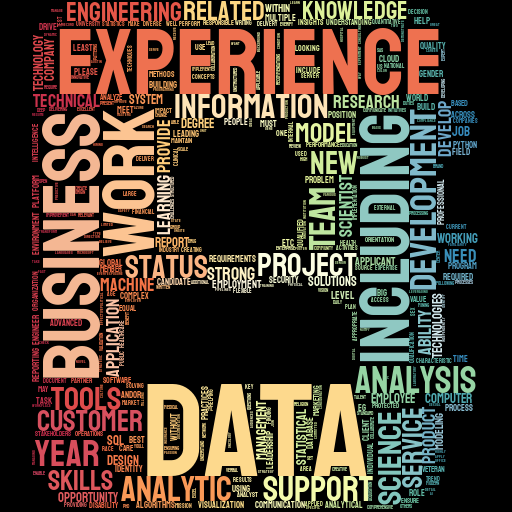

In [61]:
#Se graficaran las palabras:

#Se crea archivo del etxto
with open(directorio_script_actual+"/texto-graf.txt","w") as f:
        f.write(texto_limpio)

#Se guarda path de los archivos
path_texto=directorio_script_actual+"/texto-graf.txt"
path_imagen=directorio_script_actual+"/texto-graf1.png"

#Se crea gráfica en imagen png que se guarda en la misma carpeta del script actual
stylecloud.gen_stylecloud(file_path = path_texto,
                          output_name=path_imagen,
                          icon_name="fas fa-address-book",
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',gradient='horizontal')

Image.open(path_imagen)

### Palabras más comunes en company_name

In [62]:
#Se une el texto de toda la columna
corpus = " ".join(df['company_name'])
#Se limpia texto
texto_limpio = limpiar_texto(" ".join(corpus.split()))

#Se importan stop words
lista_stopwords = stopwords.words("english")
#Se eliminan stop words
texto_limpio=" ".join(list(filter(lambda x:x not in lista_stopwords,texto_limpio.split())))


#Se obtienen palabras con una sola ocurrrencia (hapaxes)
fdist=FreqDist(texto_limpio.split())
hapaxes=fdist.hapaxes()
#Se eliminan hapaxes
texto_limpio=" ".join(list(filter(lambda x:x not in hapaxes,texto_limpio.split())))

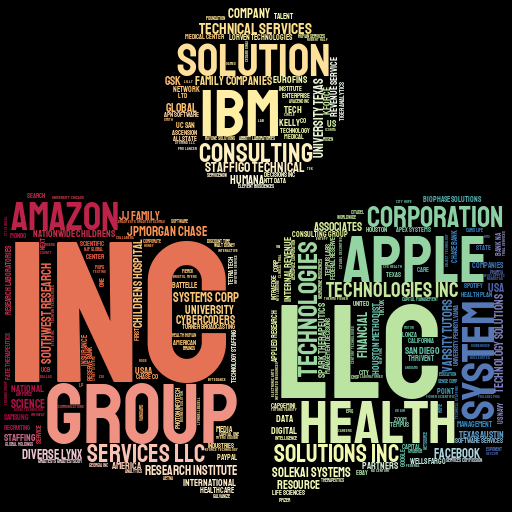

In [63]:
#Se graficaran las palabras:

#Se crea archivo del etxto
with open(directorio_script_actual+"/texto-graf.txt","w") as f:
        f.write(texto_limpio)

#Se guarda path de los archivos
path_texto=directorio_script_actual+"/texto-graf.txt"
path_imagen=directorio_script_actual+"/texto-graf2.png"

#Se crea gráfica en imagen png que se guarda en la misma carpeta del script actual
stylecloud.gen_stylecloud(file_path = path_texto,
                          output_name=path_imagen,
                          icon_name="fas fa-book-reader",
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',gradient='horizontal')

Image.open(path_imagen)

### Graficando coordenadas de la locación

Se producirá un archvio html que se guardará en la misma carpeta del script actual, el cual contendrá un mapa interactivo con puntos indicando la ubicación de la ciudad donde se oferta el empleo.
Para realizar dicho mapa, se usará la librería de KeplerGL.
https://docs.kepler.gl/

In [2]:
#pip install path/to/fiona.whl

Note: you may need to restart the kernel to use updated packages.


ERROR: fiona.whl is not a valid wheel filename.


In [ ]:
from keplergl import KeplerGl

In [ ]:
#Graficaremos la ubicación de las ciudades que ofrecen los empleos con el uso de kepler
locations = df[['city','lat','lng']]
#Para que kepler grafique correctamente las coordenadas,
#   se necesita que las columnas tengan los nombres Latitude y Longitude
locations = locations.rename(columns={'lat':'Latitude','lng':'Longitude'})
#Creamos mapa
map_empleos = KeplerGl()
map_empleos.add_data(data=locations, name='empleos_locaciones')
map_empleos.save_to_html(file_name='map_empleos.html')

**El mapa debió de haber sido guardado en la misma carpeta del script actual, como un html. El archivo debe ser abierto desde su ubicación**

# Siguientes pasos

Debido a que el alcance que tenemos en este modulo es de limpieza y exploración de datos, nos surgieron dudas para la aplicación de predicción y clasificació:

* Clasificación:
1. Clasificar por la calificación, sector, número de empleados y sueldo, el puesto que se solicita del ramo de científicos de datos

* Predicción:
1. Estimar por número de empleados, sector y localidad el salario que se percibirá.